In [54]:
from rectpack import newPacker

'''
turp = 0
orange = 1
cucumber = 2
'''

rectangles = [(100, 30, 0), (40, 60, 1), (30, 30, 2),(70, 70, 2), (100, 50, 1), (30, 30, 0)]
bins = [(300, 450), (80, 40), (200, 150)]

packer = newPacker()

# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	print(b)
	packer.add_bin(*b)

# Start packing
'''
PackingMode.Offline: The set of rectangles is known beforehand, packing won't start until pack() is called.
'''
packer.pack()

(300, 450)
(80, 40)
(200, 150)


## packer.rect_list(): only use in offline
Returns the list of packed rectangles, each one represented by the tuple 

In [55]:
# Full rectangle list
all_rects = packer.rect_list()
for rect in all_rects:
	b, x, y, w, h, rid = rect
print(all_rects)
# b - Bin index
# x - Rectangle bottom-left corner x coordinate
# y - Rectangle bottom-left corner y coordinate
# w - Rectangle width
# h - Rectangle height
# rid - User asigned rectangle id or None

[(0, 0, 0, 100, 50, 1), (0, 100, 0, 70, 70, 2), (0, 0, 50, 100, 30, 0), (0, 170, 0, 60, 40, 1), (0, 230, 0, 30, 30, 2), (0, 260, 0, 30, 30, 0)]


In [56]:
# use matplotlib to plot the rectangles
import matplotlib.pyplot as plt
from matplotlib import patches

class for_static_plot_rectangle:
    def __init__(self):
        self.width = 200
        self.height = 300
        pass
    def plot(self, all_rects):
        fig = plt.figure(figsize=(30, 10))
        ax = [fig.add_subplot(131, aspect='equal'),
                fig.add_subplot(132, aspect='equal'),
                fig.add_subplot(133, aspect='equal')]
        # set a title for the plot
        for ix, a in enumerate(ax):
            a.set_xlim(0, self.width)
            a.set_ylim(0, self.height)
            a.add_patch(patches.Rectangle((0, 0), width=self.width, height=self.height, color='white', fill=False))
            a.title.set_text('Bin {}'.format(ix))
        # add a rectangle
        for rect in all_rects:
            b, x, y, w, h, rid = rect
            # fill the rectangle and add a label and a black border
            rect = patches.Rectangle((x, y), w, h, fill=False, color='r')
            # add the black text  in the center of the rectangle
            ax[rid].text(x+w/2, y+h/2, rid, horizontalalignment='center', verticalalignment='center', color='black')
            # print(rid)
            ax[rid].add_patch(rect)
      
        # show the plot
        plt.show()


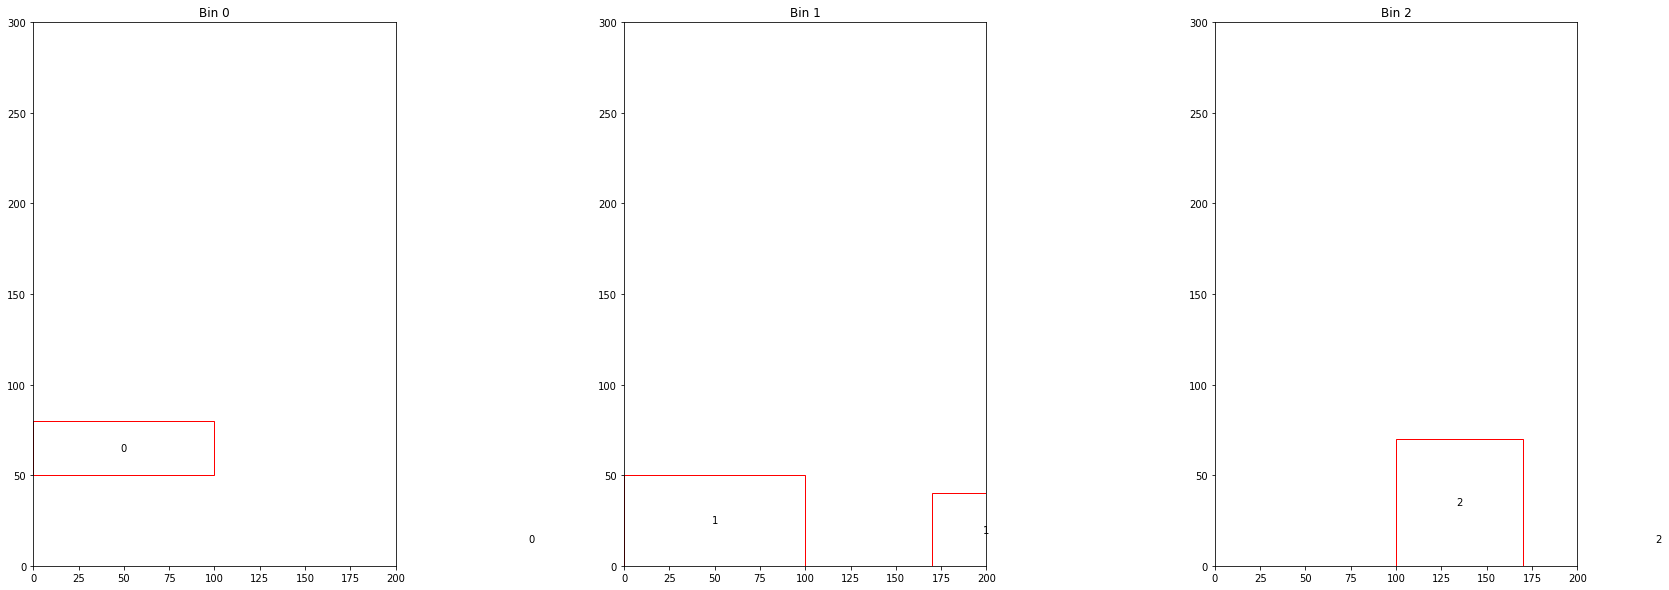

In [57]:
all_rects = packer.rect_list()
for_static_plot_rectangle().plot(all_rects)

In [58]:
for abin in packer:
  print(abin.bid) # Bin id if it has one
  for rect in abin:
    print(rect)

None
R(0, 0, 100, 50)
R(100, 0, 70, 70)
R(0, 50, 100, 30)
R(170, 0, 60, 40)
R(230, 0, 30, 30)
R(260, 0, 30, 30)


## offline done
---

# new dynamic 

### init the packer and the bin 

In [1]:
from rectpack import newPacker

N_BINS = 1
BIN_WIDTH = 30
BIN_HEIGHT = 30

class Enum(tuple): 
    __getattr__ = tuple.index
    
PackingMode = Enum(["Online", "Offline"])
PackingBin = Enum(["BNF", "BFF", "BBF", "Global"])

packer0 = newPacker(
    mode=PackingMode.Online,
    bin_algo=PackingBin.BBF,
    rotation=False,
)

packer1 = newPacker(
    mode=PackingMode.Online,
    bin_algo=PackingBin.BBF,    
    rotation=False,
)
'''
要先分好rectangles類別  0: turp, 1: orange, 2: cucumber
'''
for _ in range(N_BINS):
    packer0.add_bin(width=BIN_WIDTH, height=BIN_HEIGHT)
    packer1.add_bin(width=BIN_WIDTH, height=BIN_HEIGHT)

### plot in plt

In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches

def plot(all_rects):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, aspect='equal')
    # set a title for the plot
    ax.set_xlim(0, BIN_WIDTH)
    ax.set_ylim(0, BIN_HEIGHT)
    ax.add_patch(patches.Rectangle((0, 0), width=BIN_WIDTH, height=BIN_HEIGHT, color='white', fill=False))


    # add a rectangle
    for rect in all_rects:
        if len(all_rects) == 0:
            break
        b, x, y, w, h, rid = rect
        # fill the rectangle and add a label and a black border
        rect = patches.Rectangle((x, y), w, h, fill=False, color='r')
        # add the black text  in the center of the rectangle
        ax.text(x+w/2, y+h/2, rid, horizontalalignment='center', verticalalignment='center', color='black')
        # print(rid)
        ax.add_patch(rect)
    # set a title for the plot
    if len(all_rects) == 0:
        ax.title.set_text('Bin {}'.format('?'))
    else:
        ax.title.set_text('Bin {}'.format(rid))

    # show the plot
    plt.show()

In [3]:
def check_bin_full(rectangle, rid):
    if rectangle is False:
        print("Could not pack in bin {} anymore!!!!!!!".format(rid))
    return rectangle

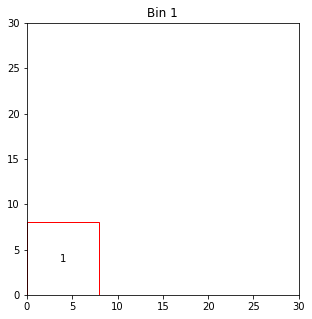

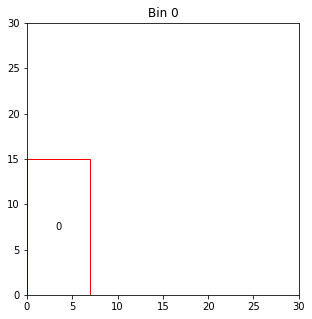

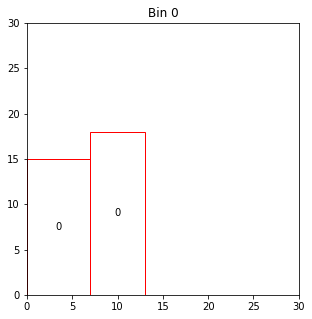

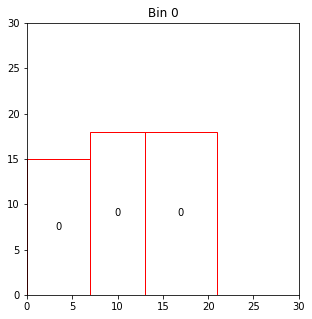

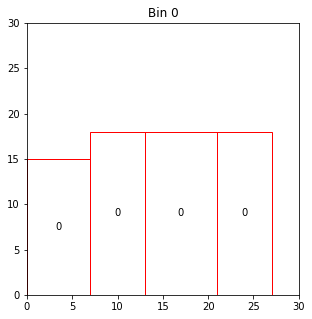

Could not pack in bin 0 anymore!!!!!!!


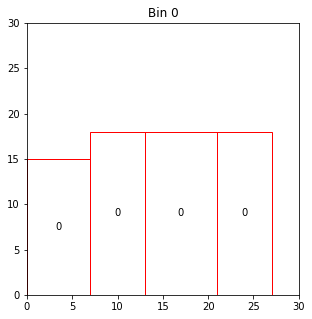

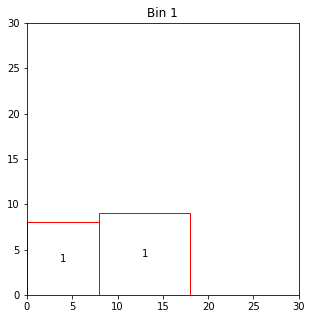

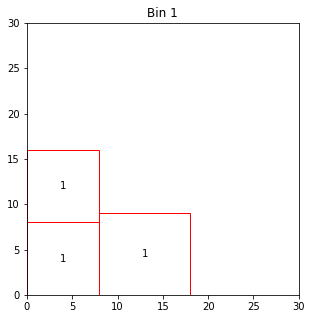

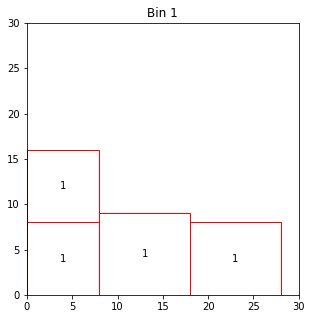

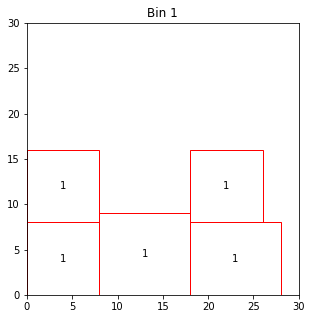

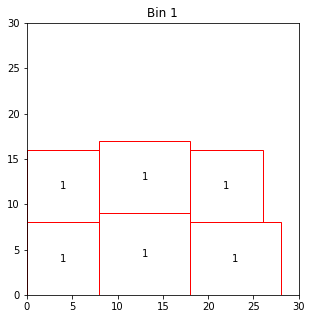

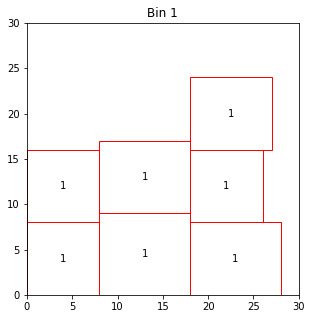

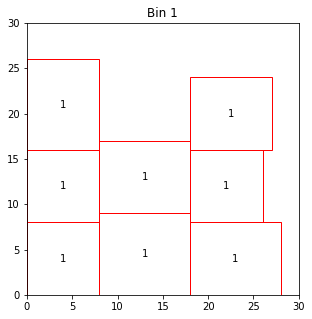

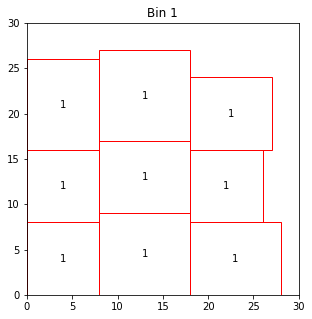

Could not pack in bin 1 anymore!!!!!!!


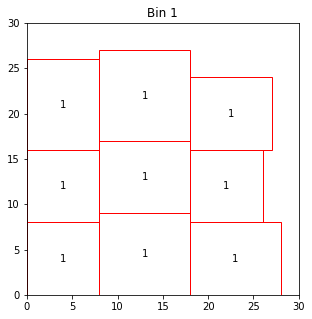

bin 0 length： 4
bin 1 length： 9


In [4]:
import random
from time import sleep

count = 0
flag0, flag1, flag2 = True, True, True

for i in range (100):

    rid = random.randint(0, 1) 
    if flag0 == False and flag1 == True:
        rid = 1
    elif flag0 == True and flag1 == False:
        rid = 0
    elif flag0 == False and flag1 == False:
        break
    # print("rid", rid)

    if rid ==0:
        rectangle0 = packer0.add_rect(random.randint(5, 8), random.randint(15, 20), rid=0)
        all_rects_0 = packer0.rect_list()
        flag0 = check_bin_full(rectangle0, rid)
        plot(all_rects_0)

    elif rid ==1:
        rectangle1 = packer1.add_rect(random.randint(8, 10), random.randint(8, 10), rid=1)
        all_rects_1 = packer1.rect_list()
        flag1 = check_bin_full(rectangle1, rid)
        plot(all_rects_1)

    # elif rid ==2:
    #     rectangle2 = packer2.add_rect(random.randint(5, 8), random.randint(15, 20), rid=2)
    #     print("bin 2 length：", len(packer2.rect_list()))
    #     all_rects_2 = packer2.rect_list()
    #     for_dynamic_plot_rectangle().plot(all_rects_2)
    #     flag2 = check_bin_full(rectangle2, rid)
print("bin 0 length：", len(packer0.rect_list()))
print("bin 1 length：", len(packer1.rect_list()))

# dynamic Done

In [8]:
print(all_rects_1)
# get the last of the list
print(all_rects_1[-1])

[(0, 0, 0, 8, 8, 1), (0, 8, 0, 10, 9, 1), (0, 0, 8, 8, 8, 1), (0, 18, 0, 10, 8, 1), (0, 18, 8, 8, 8, 1), (0, 8, 9, 10, 8, 1), (0, 18, 16, 9, 8, 1), (0, 0, 16, 8, 10, 1), (0, 8, 17, 10, 10, 1)]
(0, 8, 17, 10, 10, 1)
